<a href="https://colab.research.google.com/github/ShubhamN56/PROJECTS/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Binary Classification withh keras

In [1]:
import pandas as pd
df = pd.read_csv("/content/train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [2]:
# 2) Quality check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [3]:
df.isna().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
# 3) Seperate x and y

x=df.drop(columns=["id","loan_status"])
y=df[["loan_status"]]

In [6]:
x.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [7]:
y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [8]:
x.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [9]:
# 4_ Apply preprocessing on x

cat = list(x.columns[x.dtypes=="object"])
con = list(x.columns[x.dtypes!="object"])


In [10]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [11]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
)

pre = ColumnTransformer(
    [
        ("num",num_pipe, con),
        ("cat", cat_pipe,cat)
    ]
).set_output(transform = "pandas")


pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [13]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# 5) Train test Splt

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre, y, test_size=0.2, random_state = 42)


In [15]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
xtrain.shape

(46916, 26)

In [17]:
ytrain.head()

,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [18]:
ytrain.shape


(46916, 1)

In [19]:
xtest.shape

(11729, 26)

In [20]:
ytest.shape

(11729, 1)

In [21]:
xtrain.shape[1]

26

In [22]:
#6) Create Neural Network

from keras.models import Sequential
from keras.layers import Input,Dense,Dropout

# Initailize Neural Network

model = Sequential()

# Add Input layer

model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Layer 1

model.add(Dense(units=32,activation="relu"))

# add Dropout layer 1

model.add(Dropout(rate=0.2))

# add Dense layer 2
model.add(Dense(units=16,activation="relu"))

# add Dropout layer 2
model.add(Dropout(rate=0.2))

# add output layer

model.add(Dense(units=1, activation="sigmoid"))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile model

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
hist = model.fit(xtrain,ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8255 - loss: 0.3750 - val_accuracy: 0.9241 - val_loss: 0.2204
Epoch 2/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9199 - loss: 0.2365 - val_accuracy: 0.9330 - val_loss: 0.2043
Epoch 3/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9315 - loss: 0.2132 - val_accuracy: 0.9376 - val_loss: 0.1971
Epoch 4/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9349 - loss: 0.2045 - val_accuracy: 0.9405 - val_loss: 0.1925
Epoch 5/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9362 - loss: 0.2020 - val_accuracy: 0.9399 - val_loss: 0.1919
Epoch 6/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9415 - loss: 0.1896 - val_accuracy: 0.9405 - val_loss: 0.1916
Epoch 7/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9404 - loss: 0.1939 - val_accuracy: 0.9417 - val_loss: 0.1904
Epoch 8/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9421 - loss: 0

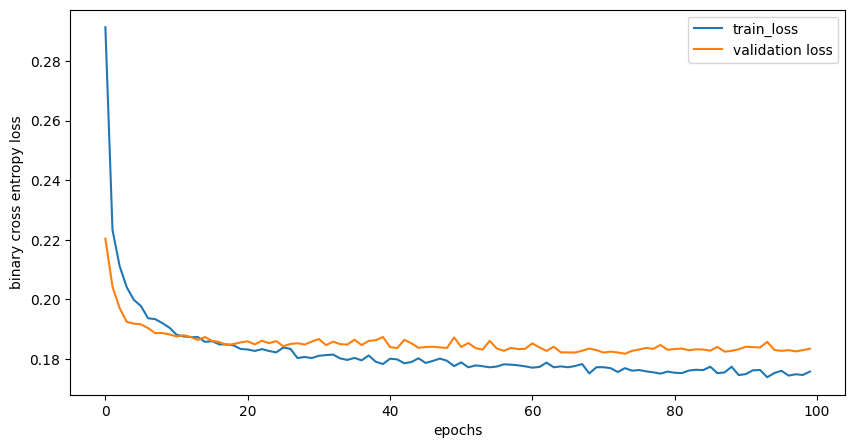

In [27]:
# plot learning curve

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history["loss"], label = "train_loss")
plt.plot(hist.history["val_loss"], label="validation loss")
plt.xlabel("epochs")
plt.ylabel("binary cross entropy loss")
plt.legend()
plt.show()

In [43]:
#Model Evaluation

model.evaluate(xtrain, ytrain)

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9509 - loss: 0.1649


[0.16773946583271027, 0.9507204294204712]

In [44]:
model.evaluate(xtest,ytest)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9508 - loss: 0.1672


[0.17251279950141907, 0.9503794312477112]

In [45]:
# predict probability

yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [46]:
yprob_train[0:5]

array([[0.14099842],
       [0.04884315],
       [0.01316375],
       [0.01678327],
       [0.0277441 ]], dtype=float32)

In [47]:
yprob_test[0:5]

array([[0.0325478 ],
       [0.01486115],
       [0.05301806],
       [0.07192384],
       [0.03867109]], dtype=float32)

In [48]:
# create function to give final prediction

def predict_result(model,x):
  yprob = model.predict(x)
  ypred = [1 if prob>=0.5 else 0 for prob in yprob]
  return ypred, yprob

ypred_train, yprob_train = predict_result(model, xtrain)


1467/1467 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [49]:
ypred_train[0:5]

[0, 0, 0, 0, 0]

In [50]:
ytrain.head()

,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [51]:
ypred_test, yprob_test = predict_result(model, xtest)
ypred_test[0:5]

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[0, 0, 0, 0, 0]

In [52]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


from matplotlib import pyplot as plt
_df_0['loan_status'].plot(kind='hist', bins=20, title='loan_status')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['loan_status'].plot(kind='line', figsize=(8, 4), title='loan_status')
plt.gca().spines[['top', 'right']].set_visible(False)

In [40]:
yprob_test[0:5]

array([[0.0325478 ],
       [0.01486115],
       [0.05301806],
       [0.07192384],
       [0.03867109]], dtype=float32)

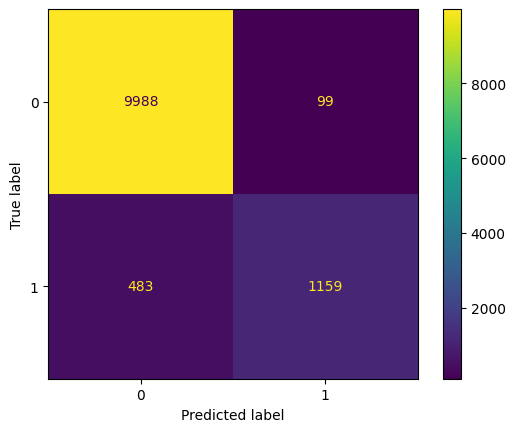

In [62]:
# Plot Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(ytest, ypred_test))

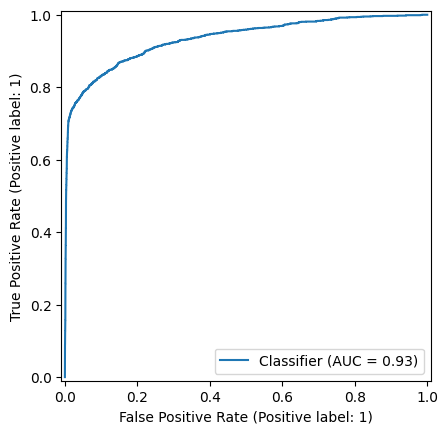

In [63]:
# ROCCurveDisplay

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(ytest, yprob_test)

In [55]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# sample prediction

xnew = pd.read_csv("/content/test_loan.csv")
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [56]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [57]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [58]:
preds,probs = predict_result(model, xnew_pre)

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [59]:
preds[0:5]

[1, 0, 0, 0, 0]

In [60]:
probs[0:5]

array([[0.9982822 ],
       [0.02614865],
       [0.39681062],
       [0.0408875 ],
       [0.198145  ]], dtype=float32)

In [65]:
# Save in Csv


res = xnew[["id"]]

res["loan_status"] = preds
res["probs"]= probs


<ipython-input-65-f03eedfb74b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["loan_status"] = preds
<ipython-input-65-f03eedfb74b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["probs"]= probs


In [66]:
res["loan_status"].value_counts()

,count
loan_status,
0,35024
1,4074


<Axes: xlabel='loan_status'>

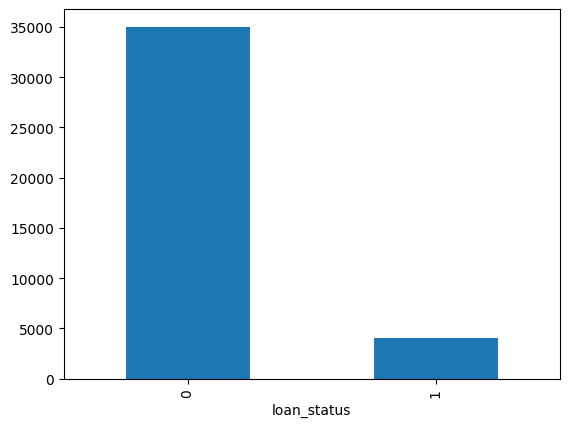

In [68]:
res["loan_status"].value_counts().plot(kind="bar")

In [69]:
res.to_csv("loan_pred.csv")

In [70]:
# model save

model.save("loanpred.keras")

In [73]:
#load the model object
from keras.models import load_model
m=load_model("/content/loanpred.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,229 (16.52 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,820 (11.02 KB)